In [1]:
from functools import partial
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.initial_conditions import sedov
from fvhoe.solver import EulerSolver
from fvhoe.visualization import sample_circular_average
import matplotlib.pyplot as plt
import numpy as np
from sedov import sedov_rduP

In [2]:
# sedov blast params
t = 0.7
gamma = 1.4

# set up numerical solution
N = 16
p = 3
snapshot_dir = f"../snapshots/sedov-3d-{N=}-{p=}"

solver = EulerSolver(
    w0=partial(sedov, dims="xyz"),
    bc=BoundaryCondition(
        x=("reflective", "outflow"),
        y=("reflective", "outflow"),
        z=("reflective", "outflow"),
    ),
    gamma=gamma,
    conservative_ic=True,
    fv_ic=True,
    nx=N,
    ny=N,
    nz=N,
    px=p,
    py=p,
    pz=p,
    riemann_solver="hllc",
    a_posteriori_slope_limiting=p > 0,
    NAD=1e-3,
    all_floors=True,
    snapshots_as_fv_averages=False,
    cupy=True,
)

# run simulation
solver.rkorder(t, snapshot_dir=snapshot_dir)

Read from snapshot directory ../snapshots/sedov-3d-N=16-p=3


t=0.7, x=[0.03125, 0.96875], y=[0.03125, 0.96875], z=0.46875
horizontal_axis='x', vertical_axis='y'


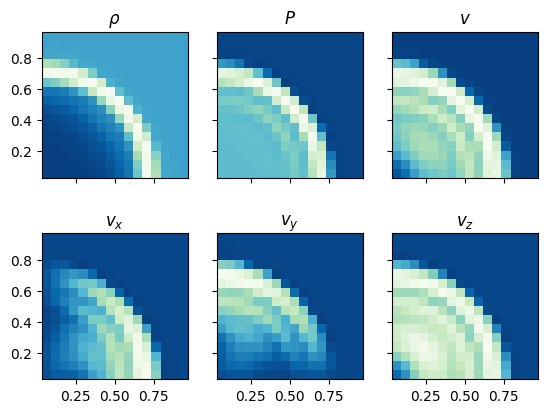

In [3]:
# plot map
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)

slicing = dict(t=t, z=0.5)

ax[0, 0].set_title(r"$\rho$")
solver.plot_2d_slice(ax[0, 0], param="rho", **slicing)

# pressure
ax[0, 1].set_title(r"$P$")
solver.plot_2d_slice(ax[0, 1], param="P", verbose=False, **slicing)

# velocity magnitude
ax[0, 2].set_title(r"$v$")
solver.plot_2d_slice(ax[0, 2], param="v", verbose=False, **slicing)

# velocity components
ax[1, 0].set_title(r"$v_x$")
solver.plot_2d_slice(ax[1, 0], param="vx", verbose=False, **slicing)

ax[1, 1].set_title(r"$v_y$")
solver.plot_2d_slice(ax[1, 1], param="vy", verbose=False, **slicing)

ax[1, 2].set_title(r"$v_z$")
solver.plot_2d_slice(ax[1, 2], param="vz", verbose=False, **slicing)

chi0=1.032758805392732


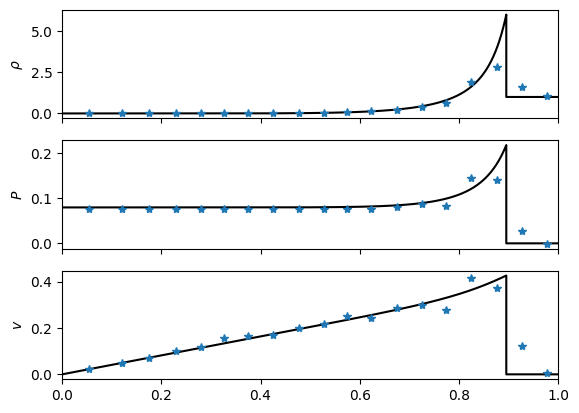

In [4]:
# find analytical solution and plot comparison

# analytical solution
r, d, u, P = sedov_rduP(t=t, dim=3, gamma=gamma)

# set up plot
fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].set_ylabel(r"$\rho$")
ax[0].plot(r, d, "k")
ax[1].set_ylabel(r"$P$")
ax[1].plot(r, P, "k")
ax[2].set_ylabel(r"$v$")
ax[2].plot(r, u, "k")
ax[2].set_xlim(0, 1)

# sample numerical solution
radii = np.linspace(0, 1, 21)
avg_rho, avg_r = sample_circular_average(
    solver, param="rho", center=(0, 0, 0), radii=radii
)
avg_P, _ = sample_circular_average(solver, param="P", center=(0, 0, 0), radii=radii)
avg_v, _ = sample_circular_average(solver, param="v", center=(0, 0, 0), radii=radii)
ax[0].plot(avg_r, avg_rho, linestyle="none", marker="*")
ax[1].plot(avg_r, avg_P, linestyle="none", marker="*")
ax[2].plot(avg_r, avg_v, linestyle="none", marker="*")